In [1]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import StandardScaler
from xgboost import plot_importance
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)

In [2]:
identifier_name = 'flight_id'

most_important_features_names = [
     'wtc',
     'groundspeed_75percentile',
     'flown_distance',
     'aircraft_type',
     'groundspeed_max',
     'altitude_25percentile',
     'flight_duration',
     'latitude_min',
     'vertical_rate_25percentile',
     'longitude_max',
     'airline',
     'altitude_median',
     'vertical_rate_std',
     'altitude_75percentile',
     'longitude_std',
     'ades',
     'latitude_max',
     'adep',
     'vertical_rate_max',
     'longitude_mean',
     'latitude_std',
     'groundspeed_min',
     'vertical_rate_median',
     'latitude_median',
     'country_code_adep',
     'longitude_min',
     'latitude_mean',
     'country_code_ades',
     'specific_humidity_median',
     'vertical_rate_75percentile',
     'taxiout_time',
     'latitude_25percentile',
     'track_25percentile',
     'month_day',
     'altitude_mean',
     'latitude_75percentile',
     'longitude_median',
     'longitude_75percentile',
     'flight_id',
     'vertical_rate_mean',
     'longitude_25percentile',
     'arrival_time_hour_minute'
]

target_name = 'tow'

global_random_state = 123

In [3]:
encoded_challenge_set = pd.read_csv('data/encoded_challenge_set.csv')

features = encoded_challenge_set[most_important_features_names].copy()
display(features)

target = encoded_challenge_set[[target_name]].copy()
display(target)

,wtc,groundspeed_75percentile,flown_distance,aircraft_type,groundspeed_max,altitude_25percentile,flight_duration,latitude_min,vertical_rate_25percentile,longitude_max,airline,altitude_median,vertical_rate_std,altitude_75percentile,longitude_std,ades,latitude_max,adep,vertical_rate_max,longitude_mean,latitude_std,groundspeed_min,vertical_rate_median,latitude_median,country_code_adep,longitude_min,latitude_mean,country_code_ades,specific_humidity_median,vertical_rate_75percentile,taxiout_time,latitude_25percentile,track_25percentile,month_day,altitude_mean,latitude_75percentile,longitude_median,longitude_75percentile,flight_id,vertical_rate_mean,longitude_25percentile,arrival_time_hour_minute
0,1,368.0,321,4,390.0,9550.00,61,51.453232,-704.0,-0.443802,20,26175.0,1609.709745,32000.0,2.655620,82,52.028643,70,5568.0,-4.817843,0.161396,102.0,0.0,51.892997,37,-8.574295,51.837035,36,0.000114,368.0,18,51.774945,270.944437,0,20991.546763,51.942919,-4.895513,-2.418875,248763780,9.470294,-7.346304,904
1,0,484.0,4193,18,495.0,33000.00,570,25.803905,0.0,2.097078,10,33000.0,691.174222,38000.0,32.832625,168,43.390968,220,3328.0,-37.864321,6.193836,109.0,0.0,35.748230,33,-80.492389,36.416839,80,0.000044,0.0,13,31.443732,230.543696,0,29599.616239,42.505463,-60.346413,-4.094342,248760618,80.330693,-66.559062,1177
2,0,406.0,3770,7,470.0,24275.00,554,41.965164,0.0,17.939514,18,36000.0,687.891983,36000.0,43.183849,171,63.104782,139,3072.0,-33.600731,8.598085,89.0,0.0,60.114143,88,-88.239066,54.653675,80,0.000022,0.0,15,44.087809,227.842138,0,29266.370244,61.133171,-22.770120,7.996781,248753824,-38.192179,-85.001760,1148
3,0,460.0,3607,21,478.0,30000.00,497,39.524386,-64.0,8.637296,10,38000.0,670.081295,39975.0,33.535859,172,54.923820,343,4224.0,-36.308858,4.887211,104.0,-64.0,47.763176,19,-75.200562,47.313159,80,0.000018,0.0,11,42.496536,228.858036,0,32681.139500,51.502545,-59.086533,-2.139416,248753852,-47.593019,-69.237322,1172
4,1,430.0,305,1,498.0,7025.00,55,51.464942,-896.0,0.029984,20,16850.0,1609.815425,31000.0,2.100484,60,53.426793,93,4224.0,-2.412936,0.731746,123.0,-256.0,52.485926,44,-6.399455,52.449270,27,0.000719,768.0,14,51.682892,99.056120,0,17836.102603,53.206329,-1.853394,-0.433886,248755934,-14.074119,-4.134391,824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369008,0,477.0,4046,21,521.0,28768.75,545,25.811234,-64.0,2.558947,10,34000.0,870.857796,36975.0,34.354707,168,49.090393,257,4160.0,-40.831541,9.563126,137.0,-64.0,34.402197,36,-80.441687,38.877157,80,0.000052,0.0,21,32.045397,245.099119,364,29688.784438,49.029201,-62.147083,-4.419947,258058361,-65.664288,-69.023288,1143
369009,1,395.0,946,1,426.0,30787.50,158,41.182114,-64.0,28.944917,14,34000.0,856.019220,34025.0,4.738333,15,52.425594,391,3584.0,21.168711,3.546660,101.0,0.0,47.335968,96,13.501244,47.262027,19,0.000040,0.0,25,44.200717,313.032203,364,29129.706377,50.561453,21.143944,25.316283,258071247,-10.504150,17.159999,749
369010,1,336.0,522,4,381.0,20368.75,99,51.266816,-64.0,6.777954,20,35975.0,1231.417354,36000.0,4.047513,83,53.728592,30,3840.0,0.286890,0.735722,93.0,0.0,53.203024,26,-6.267151,52.913110,36,0.000026,64.0,11,52.352230,278.953705,364,27860.307460,53.526403,0.316788,3.818993,258059152,3.408602,-3.278382,701
369011,1,365.0,466,1,473.0,15243.75,84,48.985199,-640.0,2.556927,20,35375.0,1352.690507,36000.0,2.960105,83,53.421707,257,4096.0,-1.596933,1.257386,103.0,0.0,51.519921,36,-6.276566,51.544348,36,0.000029,64.0,12,50.848103,285.393107,364,26310.734017,52.555976,-1.517453,1.370786,258072276,-0.770324,-4.379273,673


,tow
0,54748.000000
1,185441.000000
2,230396.000000
3,157615.000000
4,70318.447226
...,...
369008,163438.000000
369009,78707.000000
369010,62942.750000
369011,72611.161024


In [4]:
# Function to score model using Root Mean Square Error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
    
# Create a scorer
rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Make cross validation strategy
cv_strategy = KFold(n_splits=2, shuffle=True, random_state=global_random_state)

In [5]:
param_grid = {
    'n_estimators': np.arange(1000, 10001, 1000),
}

model = xgb.XGBRegressor(
    objective='reg:squarederror', 
    eval_metric='rmse',
    random_state=global_random_state,
    learning_rate=0.3,
    subsample=0.9,
    colsample_bytree=1.0,
)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error', # Use RMSE (negative because scikit-learn maximizes scores)
    cv=cv_strategy,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(features, target)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=123, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=1.0,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmse', feature_types=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    in...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=123, ...),
             n_jobs=-1,
             param_grid={'n_estimators': array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
       10000])},
             scoring='neg_root_mean_squared_error', verbose=2)

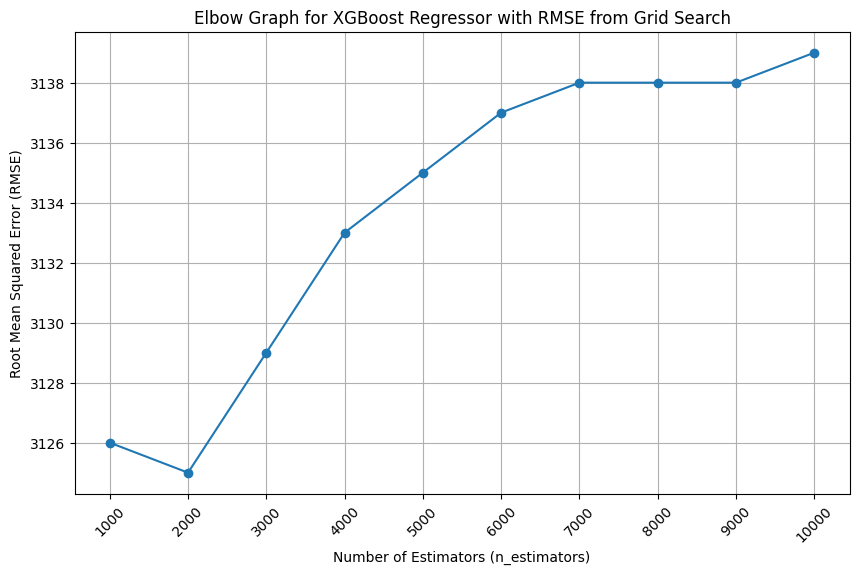

Best Parameters: {'n_estimators': 2000}
Best RMSE: 3124.815574846818


In [6]:
results = grid_search.cv_results_

rmse_values = np.round(-results['mean_test_score'])

plt.figure(figsize=(10, 6))
plt.plot(results['param_n_estimators'], rmse_values, marker='o')
plt.title('Elbow Graph for XGBoost Regressor with RMSE from Grid Search')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xticks(results['param_n_estimators'], rotation=45)
plt.grid()
plt.show()

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

In [7]:
print(results['param_n_estimators'])

[1000 2000 3000 4000 5000 6000 7000 8000 9000 10000]


In [8]:
print(rmse_values)

[3126. 3125. 3129. 3133. 3135. 3137. 3138. 3138. 3138. 3139.]
